# Bagging Ensemble

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'./Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


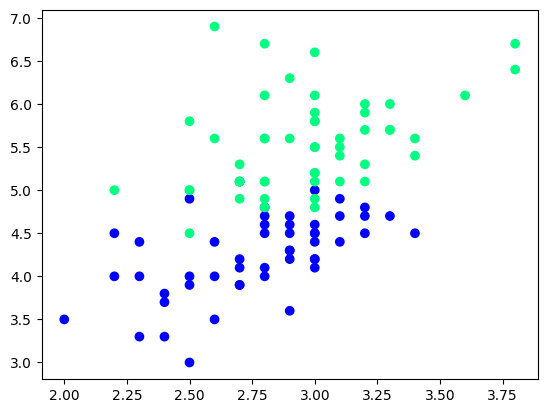

In [6]:

plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [7]:

df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
71,2.8,4.0,1
50,3.2,4.7,1
58,2.9,4.6,1
70,3.2,4.8,1
86,3.1,4.7,1
91,3.0,4.6,1
108,2.5,5.8,2
60,2.0,3.5,1
69,2.5,3.9,1


In [8]:

# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [9]:

df_train

,SepalWidthCm,PetalLengthCm,Species
133,2.8,5.1,2
60,2.0,3.5,1
104,3.0,5.8,2
144,3.3,5.7,2
116,3.0,5.5,2
142,2.7,5.1,2
76,2.8,4.8,1
84,3.0,4.5,1
56,3.3,4.7,1
58,2.9,4.6,1


In [10]:

df_val

,SepalWidthCm,PetalLengthCm,Species
55,2.8,4.5,1
125,3.2,6.0,2
102,3.0,5.9,2
86,3.1,4.7,1
145,3.0,5.2,2


In [11]:

df_test

,SepalWidthCm,PetalLengthCm,Species
98,2.5,3.0,1
66,3.0,4.5,1
72,2.5,4.9,1
127,3.0,4.9,2
91,3.0,4.6,1


In [12]:

X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [13]:

y_test

array([1, 2, 2, 1, 2])

## Case 1--> BAGGING

In [14]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag


,SepalWidthCm,PetalLengthCm,Species
142,2.7,5.1,2
133,2.8,5.1,2
104,3.0,5.8,2
60,2.0,3.5,1
76,2.8,4.8,1
104,3.0,5.8,2
133,2.8,5.1,2
104,3.0,5.8,2


In [27]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [28]:
dt_bag1 = DecisionTreeClassifier()

In [29]:

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

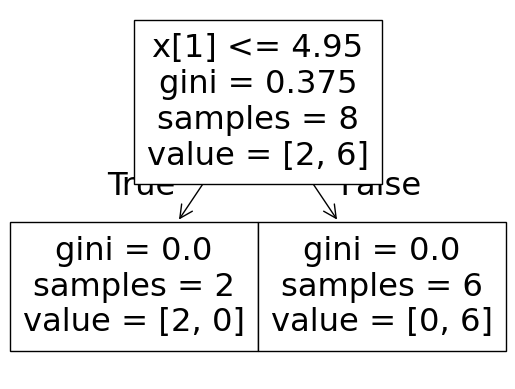

NameError: name 'plot_decision_regions' is not defined

In [30]:

evaluate(dt_bag1,X,y)

In [31]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
144,3.3,5.7,2
56,3.3,4.7,1
144,3.3,5.7,2
116,3.0,5.5,2
133,2.8,5.1,2
133,2.8,5.1,2
60,2.0,3.5,1
144,3.3,5.7,2


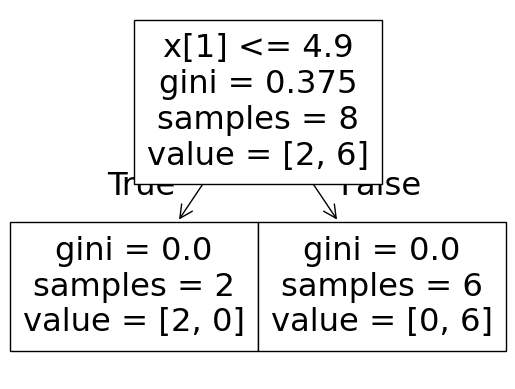

NameError: name 'plot_decision_regions' is not defined

In [32]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [33]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
116,3.0,5.5,2
84,3.0,4.5,1
133,2.8,5.1,2
84,3.0,4.5,1
56,3.3,4.7,1
56,3.3,4.7,1
58,2.9,4.6,1


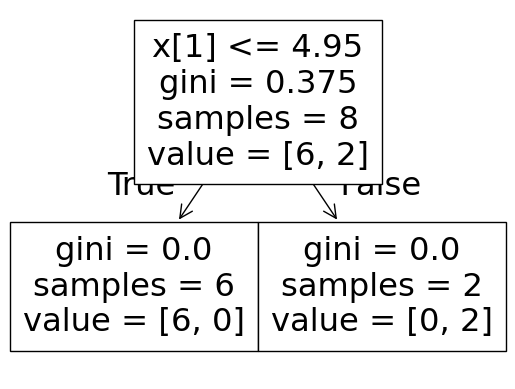

NameError: name 'plot_decision_regions' is not defined

In [34]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [35]:

df_test

,SepalWidthCm,PetalLengthCm,Species
98,2.5,3.0,1
66,3.0,4.5,1
72,2.5,4.9,1
127,3.0,4.9,2
91,3.0,4.6,1


## Predicting

In [37]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


c:\Users\ANTARIKSHYA\OneDrive\Desktop\Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ANTARIKSHYA\OneDrive\Desktop\Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\ANTARIKSHYA\OneDrive\Desktop\Machine-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
     

In [39]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.837


# Bagging 

In [41]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [42]:
bag.fit(X_train,y_train)


,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeClassifier`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeClassifier()
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",500
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",0.5
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",1.0
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",True
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `... versionadded:: 0.17 *warm_start* constructor parameter.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",0


In [43]:
y_pred = bag.predict(X_test)
accuracy_score(y_test,y_pred)


0.881

In [44]:
bag.estimators_samples_[0].shape

(4000,)

In [45]:

bag.estimators_features_[0].shape
     

(10,)

## Bagging Tips

Bagging generally gives better results than Pasting

Good results come around the 25% to 50% row sampling mark

Random patches and subspaces should be used while dealing 
with high dimensional data

To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

In [47]:
# Bagging using SVM

bag = BaggingClassifier(
    estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [48]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM",accuracy_score(y_test,y_pred))

Bagging using SVM 0.836


## Pasting

In [51]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose = 1,
    n_jobs=-1
)

In [52]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))
     

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    6.0s remaining:   42.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Pasting classifier 0.8755


[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished


In [50]:
## We can also Use Grid Search CV For Hyperparameter Optimization

## Bagging Regressor

In [56]:
import pandas as pd

# 1. Load the dataset
boston = pd.read_csv("BostonHousing.csv")

# 2. Extract Features (X) and Target (y)
# In the standard Boston CSV, 'medv' is usually the target column
X_boston = boston.drop(columns=['medv']) 
Y_boston = boston['medv']

# 3. Print Metadata
print('Dataset features names : ' + str(X_boston.columns.tolist()))
print('Dataset features size : ' + str(X_boston.shape))
print('Dataset target size : ' + str(Y_boston.shape))

Dataset features names : ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
Dataset features size : (506, 13)
Dataset target size : (506,)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston , train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sets Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
     

Train/Test Sets Sizes :  (404, 13) (102, 13) (404,) (102,)


In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [60]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [61]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [62]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.6592466510354098
R^2 score for DT 0.45816631094394544
R^2 score for KNN 0.5475962186976784


In [63]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeRegressor`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",10
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",None
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",1.0
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",True
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",1
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",0


In [64]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.980
Test Coefficient of R^2 : 0.818


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

# 1. Load and Prepare Data
# Ensure the CSV path is correct for your environment
boston = pd.read_csv("BostonHousing.csv")

# Use lowercase names consistently to avoid NameErrors
X = boston.drop(columns=['medv']) 
y = boston['medv']

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=123
)

print(f"Train/Test Sets Sizes: {X_train.shape}, {X_test.shape}")

# 3. Individual Models for Comparison
lr = LinearRegression().fit(X_train, y_train)
dt = DecisionTreeRegressor().fit(X_train, y_train)
knn = KNeighborsRegressor().fit(X_train, y_train)

print(f"R^2 score for LR: {r2_score(y_test, lr.predict(X_test)):.3f}")
print(f"R^2 score for DT: {r2_score(y_test, dt.predict(X_test)):.3f}")
print(f"R^2 score for KNN: {r2_score(y_test, knn.predict(X_test)):.3f}")

# 4. Hyperparameter Tuning with GridSearch
# Note: 'estimator' is the modern name for 'base_estimator'
params = {
    'estimator': [None, LinearRegression(), KNeighborsRegressor()],
    'n_estimators': [20, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bagging_regressor_grid = GridSearchCV(
    BaggingRegressor(random_state=1), 
    param_grid=params, 
    cv=3, 
    n_jobs=-1, 
    verbose=1
)

# Use the magic command to time the execution
%time bagging_regressor_grid.fit(X_train, y_train)

# 5. Final Results
best_model = bagging_regressor_grid.best_estimator_

print("-" * 30)
print(f'Train R^2 Score: {best_model.score(X_train, y_train):.3f}')
print(f'Test R^2 Score: {best_model.score(X_test, y_test):.3f}')
print(f'Best CV Score: {bagging_regressor_grid.best_score_:.3f}')
print(f'Best Parameters: {bagging_regressor_grid.best_params_}')

Train/Test Sets Sizes: (404, 13), (102, 13)
R^2 score for LR: 0.659
R^2 score for DT: 0.403
R^2 score for KNN: 0.548
Fitting 3 folds for each of 144 candidates, totalling 432 fits
CPU times: total: 1.3 s
Wall time: 10.8 s
------------------------------
Train R^2 Score: 0.983
Test R^2 Score: 0.805
Best CV Score: 0.871
Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'estimator': None, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
